In [17]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
import copy
import os
import networkx as nx

ori = pd.read_excel(r'TR60.xlsx')
Name = ori.iloc[:1,0]
xl = ori.iloc[:1,1]#sequence
data = ori.iloc[:,3:]#other infor

name = []
for i in range(len(Name)):
    name.append(Name.iloc[i][:])

In [18]:
path = "D:\\jupyter notebook files\\xdp2\\pdb\\"#########PDB

df_empty = pd.DataFrame()

for n in range(len(name)):    
    x = []
    y = []
    z = []
    NO_aminoacid = []
    for line in open(path + name[n] +'.pdb'):
        list = line.split()
        if list[0] == 'ATOM'or list[0] == 'HETATM':
            NO_aminoacid.append(list[5])
            x.append(float(list[6]))
            y.append(float(list[7]))
            z.append(float(list[8]))
    number_of_atom = len(x)
#计算子代的degree
    number_of_aminoacid = 1
    Rev_NO_aminoacid = [1]*number_of_atom
    for i in range(2,len(x)):
        if NO_aminoacid[i]!=NO_aminoacid[i-1]:
            number_of_aminoacid = number_of_aminoacid +1
            for j in range(i,len(x)):
                Rev_NO_aminoacid[j] = number_of_aminoacid
            
    contact = np.zeros((number_of_aminoacid, number_of_aminoacid)).astype('int64')
    for i in range(len(x)):
        for j in range(len(x)):
            if abs(Rev_NO_aminoacid[i]-Rev_NO_aminoacid[j]) > 1:
                a=[x[i],y[i],z[i]]
                b=[x[j],y[j],z[j]]
                X=np.vstack([a,b]) 
                d_ij = pdist(X)
                if d_ij <= 8 :
                    contact[Rev_NO_aminoacid[i]-1][Rev_NO_aminoacid[j]-1] = 1
    G=nx.Graph(contact)
#度中心性
    degree = []
    degree.extend(nx.degree_centrality(G).values())

#接近中心性
    closeness = []
    closeness.extend(nx.closeness_centrality(G).values())

#节点介数中心性
    betweenness = []
    betweenness.extend(nx.betweenness_centrality(G).values())

#计算子代的位点
    son_of_site = []
    for i in range(len(contact)):
        site = []
        for j in range(len(contact)):
            if contact[i][j] == 1:
                site.append(j+1)
        son_of_site.append(site)
    
#计算子代的degree & closeness
    a1 = []
    a2 = []
    a3 = []
    for i in range(len(son_of_site)):
        b1 = []
        b2 = []
        b3 = []
        for j in range(len(son_of_site[i])):
            b1.append(degree[son_of_site[i][j]-1])
            b2.append(closeness[son_of_site[i][j]-1])
            b3.append(betweenness[son_of_site[i][j]-1])
        a1.append(b1)
        a2.append(b2)
        a3.append(b3)
       
    
    degree_of_son = []
    closeness_of_son = []
    betweenness_of_son = []
    for i in range(len(a1)):
        degree_of_son.append(sum(a1[i]))
        closeness_of_son.append(sum(a2[i]))
        betweenness_of_son.append(sum(a3[i]))
    info_ = []
    for j in range(len(data)):
        if data.iloc[j,0] == Name[n]: 
            info_.append(data.iloc[j,6:])
    info = pd.DataFrame(info_)
    info.reset_index(drop = True,inplace = True)
    
    info2 = []
    for i in range(len(son_of_site)):
        info1 = []
        for j in range(len(son_of_site[i])):
            info1.append(info.loc[son_of_site[i][j]-1])
        info2.append(info1)
    
    info51 = []
    info61 = []
    info52 = []
    for i in range(len(info2)):
        info31 = []
        info41 = []
        info32 = []
        for j in range(len(info2[i])):
            for k in range(len(info2[i][j])):
                info31.append(info2[i][j][k] * a1[i][j])
                info41.append(info2[i][j][k] * a2[i][j])
                info32.append(info2[i][j][k] * a3[i][j])
        info51.append(info31)
        info61.append(info41)
        info52.append(info32)
    
    info7 = []
    for i in range(len(info51)):
        x1 = np.array(info51[i])
        x2 = int(len(x1)/30)
        x3 = np.reshape(x1, (x2,30))
        info7.append(np.sum(x3, axis=0))

    info8 = []
    for i in range(len(info61)):
        y1 = np.array(info61[i])
        y2 = int(len(y1)/30)
        y3 = np.reshape(y1, (y2,30))
        info8.append(np.sum(y3, axis=0))
        
    info9 = []
    for i in range(len(info52)):
        x1 = np.array(info52[i])
        x2 = int(len(x1)/30)
        x3 = np.reshape(x1, (x2,30))
        info9.append(np.sum(x3, axis=0))
   
    e=np.hstack((info7,info8,info9))
    df_e = pd.DataFrame(e)
    df_empty = pd.concat([df_empty,df_e],ignore_index=True)

[[0. 9. 2. 4. 7.]
 [0. 0. 3. 4. 0.]
 [0. 0. 0. 8. 4.]
 [0. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0.]]


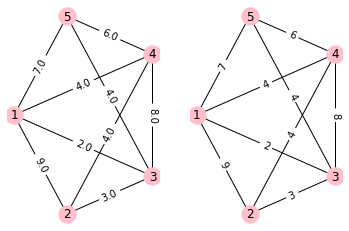